In [1]:
# pandas
# scikit learn
# shap

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import shap
import random

In [3]:
random.seed(42)

data_columns = ['invar01', 'invar02', 'invar03', 'invar04', 'invar05',
                'invar06', 'invar07', 'invar08', 'invar09', 'invar10',
                'outvar']

output_class = ['high', 'medium', 'low']

data_example = pd.DataFrame([[random.random(), 
                              random.random() * 10, 
                              random.random() * 100, 
                              random.random() * 2,
                              random.random() * 3,
                              random.random() * 4,
                              random.random() * 5,
                              random.random() * 6,
                              random.random() * 10,
                              random.random() * 100,
                              random.choice(output_class)] for i in range(100)], 
                            index=None, 
                            columns=data_columns)

df = pd.DataFrame(data_example, columns=data_columns)

X = df[['invar01', 'invar02', 'invar03', 'invar04', 'invar05',
        'invar06', 'invar07', 'invar08', 'invar09', 'invar10']]
y = df[['outvar']]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (100, 10)
y shape: (100, 1)


In [4]:
le = LabelEncoder()
le.fit(output_class)
y = le.transform(y.values.ravel())

print(f"high   - {le.transform(['high'])}")
print(f"medium - {le.transform(['medium'])}")
print(f"low    - {le.transform(['low'])}")

high   - [0]
medium - [2]
low    - [1]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print()
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape: (67, 10)
X_test shape : (33, 10)

y_train shape: (67,)
y_test shape : (33,)


In [6]:
scaler_minmax = MinMaxScaler()
# scaler_standard = StandardScaler()

scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)
X_scaled_minmax_test = scaler_minmax.transform(X_test)

In [7]:
model = RandomForestClassifier()
model.fit(X_scaled_minmax_train, y_train)

RandomForestClassifier()

In [8]:
pred_train = model.predict(X_scaled_minmax_train)
print(f"train score: {model.score(X_scaled_minmax_train, y_train):.2f}")

pred_test = model.predict(X_scaled_minmax_test)
print(f"test score: {model.score(X_scaled_minmax_test, y_test):.2f}")

train score: 1.00
test score: 0.30


In [9]:
# train
cfreport_train = classification_report(y_train, pred_train)
print(f"classification report - train \n{cfreport_train}")

# test
cfreport_test = classification_report(y_test, pred_test)
print(f"classification report - test \n{cfreport_test}")

classification report - train 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

classification report - test 
              precision    recall  f1-score   support

           0       0.39      0.47      0.42        15
           1       0.00      0.00      0.00         9
           2       0.27      0.33      0.30         9

    accuracy                           0.30        33
   macro avg       0.22      0.27      0.24        33
weighted avg       0.25      0.30      0.27        33



In [10]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'mathtext.default':  'default'})
plt.rcParams.update({'font.size': 12})

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


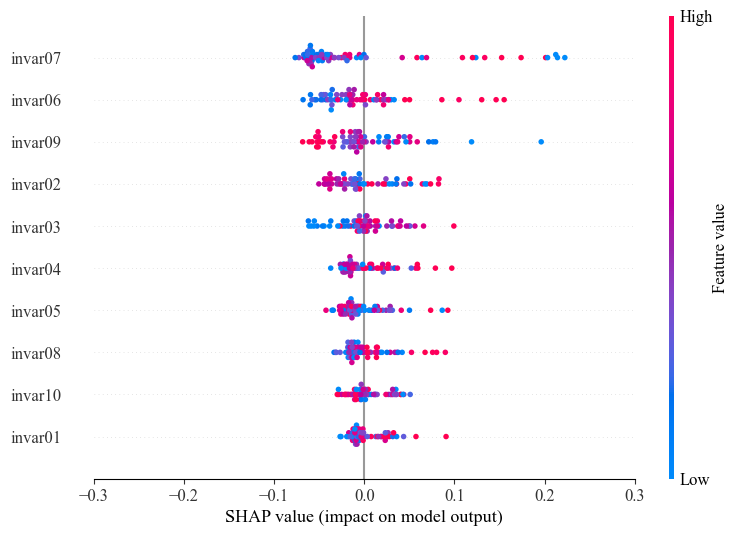

In [11]:
fs = 12

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_scaled_minmax_train)

shap.summary_plot(shap_values[1], 
                  X_scaled_minmax_train, 
                  feature_names=X.columns, 
                  show=False)

plt.xlim([-0.3, 0.3])

fig, ax = plt.gcf(), plt.gca()
# x, y axis fontsize
ax.tick_params(labelsize=fs)
# colorbar fontsize
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=fs)

plt.show()